In [1]:
import os
import numpy as np
font_dir=os.path.join(os.getcwd(),'../data/font')
font_path_list=[os.path.join(font_dir,file_name) for file_name in os.listdir(font_dir)]

In [2]:
font_path_list,len(font_path_list)

(['/Users/yizuotian/pyspace/notebook/python/../data/font/HYShiGuangTiW.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/方正隶书简体.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/華康香港標準宋體_0.TTC',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/仿宋_GB2312.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/方正楷体GBK.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/香港标准宋体繁体.ttc',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/HYWaiWaiTiJ.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/HYPPTiJ.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/楷体_GB2312.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/华文隶书.TTF',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/方正粗圆简体.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/汉仪瘦金书繁_宋徽宗瘦金体.ttf',
  '/Users/yizuotian/pyspace/notebook/python/../data/font/宋体_GB18030+%26+新宋体_GB18030.ttc',
  '/Users/yizuotian/pyspace/notebook/py

In [10]:
from PIL import Image, ImageDraw, ImageFont
def put_text(image,font, x, y, text, color=None):
    """
    写中文字
    :param image:
    :param x:
    :param y:
    :param text:
    :param color:
    :return:
    """
    im = Image.fromarray(image)
    draw = ImageDraw.Draw(im)
    color = (255, 0, 0) if color is None else color
    draw.text((x, y), text, color, font=font)
    return np.array(im)

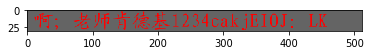

In [11]:
import matplotlib.pyplot as plt
import numpy as np
image = np.ones([32,512,3],dtype=np.uint8)*100
font=ImageFont.truetype(font_path_list[np.random.randint(14)],size=30)
im = put_text(image,font,10,1,'啊；老师肯德基1234cakjEIOJ：LK')
plt.imshow(im)

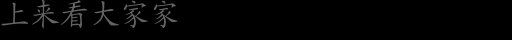

In [12]:
gray = Image.fromarray(np.zeros((40,512),dtype=np.uint8))
draw = ImageDraw.Draw(gray)
draw.text((0,0),'上来看大家家',100,font=font)
gray

In [14]:
np.max(np.array(gray))

100

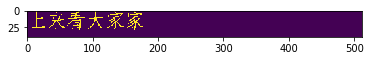

In [89]:
ret, thresh=cv2.threshold(np.array(gray), 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU )
plt.imshow(thresh)

In [90]:
hs,ws=np.where(thresh)
np.min(hs),np.max(hs),np.min(ws),np.max(ws)

(1, 29, 2, 177)

In [15]:
for f in font_path_list:
    font=ImageFont.truetype(f,size=30)
    print(font.getsize('第阿大是大非斯蒂芬'),font.getsize('abc'),font.getsize('ABC'))

(270, 33) (42, 27) (51, 27)
(270, 27) (49, 27) (60, 27)
(270, 29) (45, 26) (45, 26)
(270, 30) (45, 26) (45, 26)
(270, 31) (40, 26) (61, 26)
(270, 29) (45, 26) (45, 26)
(270, 29) (34, 27) (46, 27)
(270, 30) (42, 26) (43, 26)
(270, 30) (45, 26) (45, 26)
(270, 26) (39, 24) (58, 27)
(270, 31) (48, 27) (54, 27)
(270, 29) (31, 24) (44, 24)
(270, 29) (45, 26) (45, 26)
(270, 30) (47, 27) (60, 27)
(270, 31) (54, 29) (62, 29)
(270, 29) (45, 26) (45, 26)


In [165]:
font.getsize('第'),font.getmask('第')

((30, 29), <ImagingCore at 0x10b5a73f0>)

In [153]:
 font_path_list[1]

'/Users/yizuotian/pyspace/notebook/python/../data/font/造字工房尚黑G0v1纤细长体.otf'

In [107]:
178/6,148/6 ,115/5

(29.666666666666668, 24.666666666666668, 23.0)

In [158]:
[i,j for i in range(5) for j in range(10)]

SyntaxError: invalid syntax (<ipython-input-158-4cf189009d61>, line 1)

## cv2.threshold

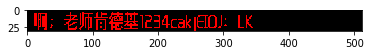

In [102]:
import cv2

ret, thresh=cv2.threshold(im, 100, 255, cv2.THRESH_BINARY )
plt.imshow(thresh)

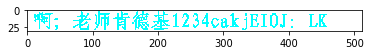

In [57]:
ret, thresh=cv2.threshold(im, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
#cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU

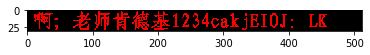

In [58]:
plt.imshow(255-thresh)

In [146]:
512/16

32.0

In [62]:
from fontTools.ttLib import TTFont as t1
import json

def toUnicode(oneStr):
    t=oneStr
    if  t[:3] == 'uni':t=t.replace('uni','\\u') 
    if  t[:2] == 'uF':t=t.replace('uF','\\u') 
    return json.loads(f'"{t}"') 

def printUNI(fontName,imagePath):
    font = t1(fontName)
    gs = font.getGlyphSet()
    glyphNames = font.getGlyphNames()
    print(len(glyphNames))
    strs=''
    for idx,i in enumerate(glyphNames):
        if i[0] == '.':#跳过'.notdef', '.null'
            continue
        if i == 'union':
            continue
        print (i)
        char=toUnicode(i)
        print (i , char )
        print(idx)
        if len(char)==1:
            strs+=char
    return strs
        
fontName=font_path_list[3]
imagePath="images/FSung-F"
x=printUNI(fontName,imagePath)


22024
A
A A
1
Alpha
Alpha Alpha
2
B
B B
3
Beta
Beta Beta
4
C
C C
5
Chi
Chi Chi
6
D
D D
7
E
E E
8
Epsilon
Epsilon Epsilon
9
Eta
Eta Eta
10
F
F F
11
G
G G
12
Gamma
Gamma Gamma
13
H
H H
14
H18533
H18533 H18533
15
H22073
H22073 H22073
16
I
I I
17
Iota
Iota Iota
18
J
J J
19
K
K K
20
Kappa
Kappa Kappa
21
L
L L
22
Lambda
Lambda Lambda
23
M
M M
24
Mu
Mu Mu
25
N
N N
26
Nu
Nu Nu
27
O
O O
28
Omicron
Omicron Omicron
29
P
P P
30
Phi
Phi Phi
31
Pi
Pi Pi
32
Psi
Psi Psi
33
Q
Q Q
34
R
R R
35
Rho
Rho Rho
36
S
S S
37
SF010000
SF010000 SF010000
38
SF020000
SF020000 SF020000
39
SF030000
SF030000 SF030000
40
SF040000
SF040000 SF040000
41
SF050000
SF050000 SF050000
42
SF060000
SF060000 SF060000
43
SF070000
SF070000 SF070000
44
SF080000
SF080000 SF080000
45
SF090000
SF090000 SF090000
46
SF100000
SF100000 SF100000
47
SF110000
SF110000 SF110000
48
SF190000
SF190000 SF190000
49
SF200000
SF200000 SF200000
50
SF210000
SF210000 SF210000
51
SF220000
SF220000 SF220000
52
SF230000
SF230000 SF230000
53
SF240000
SF24000

uni2479 ⑹
431
uni247A
uni247A ⑺
432
uni247B
uni247B ⑻
433
uni247C
uni247C ⑼
434
uni247D
uni247D ⑽
435
uni247E
uni247E ⑾
436
uni247F
uni247F ⑿
437
uni2480
uni2480 ⒀
438
uni2481
uni2481 ⒁
439
uni2482
uni2482 ⒂
440
uni2483
uni2483 ⒃
441
uni2484
uni2484 ⒄
442
uni2485
uni2485 ⒅
443
uni2486
uni2486 ⒆
444
uni2487
uni2487 ⒇
445
uni2488
uni2488 ⒈
446
uni2489
uni2489 ⒉
447
uni248A
uni248A ⒊
448
uni248B
uni248B ⒋
449
uni248C
uni248C ⒌
450
uni248D
uni248D ⒍
451
uni248E
uni248E ⒎
452
uni248F
uni248F ⒏
453
uni2490
uni2490 ⒐
454
uni2491
uni2491 ⒑
455
uni2492
uni2492 ⒒
456
uni2493
uni2493 ⒓
457
uni2494
uni2494 ⒔
458
uni2495
uni2495 ⒕
459
uni2496
uni2496 ⒖
460
uni2497
uni2497 ⒗
461
uni2498
uni2498 ⒘
462
uni2499
uni2499 ⒙
463
uni249A
uni249A ⒚
464
uni249B
uni249B ⒛
465
uni2501
uni2501 ━
466
uni2503
uni2503 ┃
467
uni2504
uni2504 ┄
468
uni2505
uni2505 ┅
469
uni2506
uni2506 ┆
470
uni2507
uni2507 ┇
471
uni2508
uni2508 ┈
472
uni2509
uni2509 ┉
473
uni250A
uni250A ┊
474
uni250B
uni250B ┋
475
uni250D
uni250D ┍


uni4F29 伩
1131
uni4F2A
uni4F2A 伪
1132
uni4F2B
uni4F2B 伫
1133
uni4F2C
uni4F2C 伬
1134
uni4F2D
uni4F2D 伭
1135
uni4F2E
uni4F2E 伮
1136
uni4F2F
uni4F2F 伯
1137
uni4F30
uni4F30 估
1138
uni4F31
uni4F31 伱
1139
uni4F32
uni4F32 伲
1140
uni4F33
uni4F33 伳
1141
uni4F34
uni4F34 伴
1142
uni4F35
uni4F35 伵
1143
uni4F36
uni4F36 伶
1144
uni4F37
uni4F37 伷
1145
uni4F38
uni4F38 伸
1146
uni4F39
uni4F39 伹
1147
uni4F3A
uni4F3A 伺
1148
uni4F3B
uni4F3B 伻
1149
uni4F3C
uni4F3C 似
1150
uni4F3D
uni4F3D 伽
1151
uni4F3E
uni4F3E 伾
1152
uni4F3F
uni4F3F 伿
1153
uni4F40
uni4F40 佀
1154
uni4F41
uni4F41 佁
1155
uni4F42
uni4F42 佂
1156
uni4F43
uni4F43 佃
1157
uni4F44
uni4F44 佄
1158
uni4F45
uni4F45 佅
1159
uni4F46
uni4F46 但
1160
uni4F47
uni4F47 佇
1161
uni4F48
uni4F48 佈
1162
uni4F49
uni4F49 佉
1163
uni4F4A
uni4F4A 佊
1164
uni4F4B
uni4F4B 佋
1165
uni4F4C
uni4F4C 佌
1166
uni4F4D
uni4F4D 位
1167
uni4F4E
uni4F4E 低
1168
uni4F4F
uni4F4F 住
1169
uni4F50
uni4F50 佐
1170
uni4F51
uni4F51 佑
1171
uni4F52
uni4F52 佒
1172
uni4F53
uni4F53 体
1173
uni4F54
uni4F54 佔
1

uni5093 傓
1493
uni5094
uni5094 傔
1494
uni5095
uni5095 傕
1495
uni5096
uni5096 傖
1496
uni5097
uni5097 傗
1497
uni5098
uni5098 傘
1498
uni5099
uni5099 備
1499
uni509A
uni509A 傚
1500
uni509B
uni509B 傛
1501
uni509C
uni509C 傜
1502
uni509D
uni509D 傝
1503
uni509E
uni509E 傞
1504
uni509F
uni509F 傟
1505
uni50A0
uni50A0 傠
1506
uni50A1
uni50A1 傡
1507
uni50A2
uni50A2 傢
1508
uni50A3
uni50A3 傣
1509
uni50A4
uni50A4 傤
1510
uni50A5
uni50A5 傥
1511
uni50A6
uni50A6 傦
1512
uni50A7
uni50A7 傧
1513
uni50A8
uni50A8 储
1514
uni50A9
uni50A9 傩
1515
uni50AA
uni50AA 傪
1516
uni50AB
uni50AB 傫
1517
uni50AC
uni50AC 催
1518
uni50AD
uni50AD 傭
1519
uni50AE
uni50AE 傮
1520
uni50AF
uni50AF 傯
1521
uni50B0
uni50B0 傰
1522
uni50B1
uni50B1 傱
1523
uni50B2
uni50B2 傲
1524
uni50B3
uni50B3 傳
1525
uni50B4
uni50B4 傴
1526
uni50B5
uni50B5 債
1527
uni50B6
uni50B6 傶
1528
uni50B7
uni50B7 傷
1529
uni50B8
uni50B8 傸
1530
uni50B9
uni50B9 傹
1531
uni50BA
uni50BA 傺
1532
uni50BB
uni50BB 傻
1533
uni50BC
uni50BC 傼
1534
uni50BD
uni50BD 傽
1535
uni50BE
uni50BE 傾
1

2313
uni53C8
uni53C8 又
2314
uni53C9
uni53C9 叉
2315
uni53CA
uni53CA 及
2316
uni53CB
uni53CB 友
2317
uni53CC
uni53CC 双
2318
uni53CD
uni53CD 反
2319
uni53CE
uni53CE 収
2320
uni53CF
uni53CF 叏
2321
uni53D0
uni53D0 叐
2322
uni53D1
uni53D1 发
2323
uni53D2
uni53D2 叒
2324
uni53D3
uni53D3 叓
2325
uni53D4
uni53D4 叔
2326
uni53D5
uni53D5 叕
2327
uni53D6
uni53D6 取
2328
uni53D7
uni53D7 受
2329
uni53D8
uni53D8 变
2330
uni53D9
uni53D9 叙
2331
uni53DA
uni53DA 叚
2332
uni53DB
uni53DB 叛
2333
uni53DC
uni53DC 叜
2334
uni53DD
uni53DD 叝
2335
uni53DE
uni53DE 叞
2336
uni53DF
uni53DF 叟
2337
uni53E0
uni53E0 叠
2338
uni53E1
uni53E1 叡
2339
uni53E2
uni53E2 叢
2340
uni53E3
uni53E3 口
2341
uni53E4
uni53E4 古
2342
uni53E5
uni53E5 句
2343
uni53E6
uni53E6 另
2344
uni53E7
uni53E7 叧
2345
uni53E8
uni53E8 叨
2346
uni53E9
uni53E9 叩
2347
uni53EA
uni53EA 只
2348
uni53EB
uni53EB 叫
2349
uni53EC
uni53EC 召
2350
uni53ED
uni53ED 叭
2351
uni53EE
uni53EE 叮
2352
uni53EF
uni53EF 可
2353
uni53F0
uni53F0 台
2354
uni53F1
uni53F1 叱
2355
uni53F2
uni53F2 史
2356
uni53F

2794
uni55A9
uni55A9 喩
2795
uni55AA
uni55AA 喪
2796
uni55AB
uni55AB 喫
2797
uni55AC
uni55AC 喬
2798
uni55AD
uni55AD 喭
2799
uni55AE
uni55AE 單
2800
uni55AF
uni55AF 喯
2801
uni55B0
uni55B0 喰
2802
uni55B1
uni55B1 喱
2803
uni55B2
uni55B2 喲
2804
uni55B3
uni55B3 喳
2805
uni55B4
uni55B4 喴
2806
uni55B5
uni55B5 喵
2807
uni55B6
uni55B6 営
2808
uni55B7
uni55B7 喷
2809
uni55B8
uni55B8 喸
2810
uni55B9
uni55B9 喹
2811
uni55BA
uni55BA 喺
2812
uni55BB
uni55BB 喻
2813
uni55BC
uni55BC 喼
2814
uni55BD
uni55BD 喽
2815
uni55BE
uni55BE 喾
2816
uni55BF
uni55BF 喿
2817
uni55C0
uni55C0 嗀
2818
uni55C1
uni55C1 嗁
2819
uni55C2
uni55C2 嗂
2820
uni55C3
uni55C3 嗃
2821
uni55C4
uni55C4 嗄
2822
uni55C5
uni55C5 嗅
2823
uni55C6
uni55C6 嗆
2824
uni55C7
uni55C7 嗇
2825
uni55C8
uni55C8 嗈
2826
uni55C9
uni55C9 嗉
2827
uni55CA
uni55CA 嗊
2828
uni55CB
uni55CB 嗋
2829
uni55CC
uni55CC 嗌
2830
uni55CD
uni55CD 嗍
2831
uni55CE
uni55CE 嗎
2832
uni55CF
uni55CF 嗏
2833
uni55D0
uni55D0 嗐
2834
uni55D1
uni55D1 嗑
2835
uni55D2
uni55D2 嗒
2836
uni55D3
uni55D3 嗓
2837
uni55D

uni5744 坄
3206
uni5745
uni5745 坅
3207
uni5746
uni5746 坆
3208
uni5747
uni5747 均
3209
uni5748
uni5748 坈
3210
uni5749
uni5749 坉
3211
uni574A
uni574A 坊
3212
uni574B
uni574B 坋
3213
uni574C
uni574C 坌
3214
uni574D
uni574D 坍
3215
uni574E
uni574E 坎
3216
uni574F
uni574F 坏
3217
uni5750
uni5750 坐
3218
uni5751
uni5751 坑
3219
uni5752
uni5752 坒
3220
uni5753
uni5753 坓
3221
uni5754
uni5754 坔
3222
uni5755
uni5755 坕
3223
uni5756
uni5756 坖
3224
uni5757
uni5757 块
3225
uni5758
uni5758 坘
3226
uni5759
uni5759 坙
3227
uni575A
uni575A 坚
3228
uni575B
uni575B 坛
3229
uni575C
uni575C 坜
3230
uni575D
uni575D 坝
3231
uni575E
uni575E 坞
3232
uni575F
uni575F 坟
3233
uni5760
uni5760 坠
3234
uni5761
uni5761 坡
3235
uni5762
uni5762 坢
3236
uni5763
uni5763 坣
3237
uni5764
uni5764 坤
3238
uni5765
uni5765 坥
3239
uni5766
uni5766 坦
3240
uni5767
uni5767 坧
3241
uni5768
uni5768 坨
3242
uni5769
uni5769 坩
3243
uni576A
uni576A 坪
3244
uni576B
uni576B 坫
3245
uni576C
uni576C 坬
3246
uni576D
uni576D 坭
3247
uni576E
uni576E 坮
3248
uni576F
uni576F 坯
3

uni58E7
uni58E7 壧
3625
uni58E8
uni58E8 壨
3626
uni58E9
uni58E9 壩
3627
uni58EA
uni58EA 壪
3628
uni58EB
uni58EB 士
3629
uni58EC
uni58EC 壬
3630
uni58ED
uni58ED 壭
3631
uni58EE
uni58EE 壮
3632
uni58EF
uni58EF 壯
3633
uni58F0
uni58F0 声
3634
uni58F1
uni58F1 壱
3635
uni58F2
uni58F2 売
3636
uni58F3
uni58F3 壳
3637
uni58F4
uni58F4 壴
3638
uni58F5
uni58F5 壵
3639
uni58F6
uni58F6 壶
3640
uni58F7
uni58F7 壷
3641
uni58F8
uni58F8 壸
3642
uni58F9
uni58F9 壹
3643
uni58FA
uni58FA 壺
3644
uni58FB
uni58FB 壻
3645
uni58FC
uni58FC 壼
3646
uni58FD
uni58FD 壽
3647
uni58FE
uni58FE 壾
3648
uni58FF
uni58FF 壿
3649
uni5900
uni5900 夀
3650
uni5901
uni5901 夁
3651
uni5902
uni5902 夂
3652
uni5903
uni5903 夃
3653
uni5904
uni5904 处
3654
uni5905
uni5905 夅
3655
uni5906
uni5906 夆
3656
uni5907
uni5907 备
3657
uni5908
uni5908 夈
3658
uni5909
uni5909 変
3659
uni590A
uni590A 夊
3660
uni590B
uni590B 夋
3661
uni590C
uni590C 夌
3662
uni590D
uni590D 复
3663
uni590E
uni590E 夎
3664
uni590F
uni590F 夏
3665
uni5910
uni5910 夐
3666
uni5911
uni5911 夑
3667
uni5912
uni

uni5ACF
uni5ACF 嫏
4113
uni5AD0
uni5AD0 嫐
4114
uni5AD1
uni5AD1 嫑
4115
uni5AD2
uni5AD2 嫒
4116
uni5AD3
uni5AD3 嫓
4117
uni5AD4
uni5AD4 嫔
4118
uni5AD5
uni5AD5 嫕
4119
uni5AD6
uni5AD6 嫖
4120
uni5AD7
uni5AD7 嫗
4121
uni5AD8
uni5AD8 嫘
4122
uni5AD9
uni5AD9 嫙
4123
uni5ADA
uni5ADA 嫚
4124
uni5ADB
uni5ADB 嫛
4125
uni5ADC
uni5ADC 嫜
4126
uni5ADD
uni5ADD 嫝
4127
uni5ADE
uni5ADE 嫞
4128
uni5ADF
uni5ADF 嫟
4129
uni5AE0
uni5AE0 嫠
4130
uni5AE1
uni5AE1 嫡
4131
uni5AE2
uni5AE2 嫢
4132
uni5AE3
uni5AE3 嫣
4133
uni5AE4
uni5AE4 嫤
4134
uni5AE5
uni5AE5 嫥
4135
uni5AE6
uni5AE6 嫦
4136
uni5AE7
uni5AE7 嫧
4137
uni5AE8
uni5AE8 嫨
4138
uni5AE9
uni5AE9 嫩
4139
uni5AEA
uni5AEA 嫪
4140
uni5AEB
uni5AEB 嫫
4141
uni5AEC
uni5AEC 嫬
4142
uni5AED
uni5AED 嫭
4143
uni5AEE
uni5AEE 嫮
4144
uni5AEF
uni5AEF 嫯
4145
uni5AF0
uni5AF0 嫰
4146
uni5AF1
uni5AF1 嫱
4147
uni5AF2
uni5AF2 嫲
4148
uni5AF3
uni5AF3 嫳
4149
uni5AF4
uni5AF4 嫴
4150
uni5AF5
uni5AF5 嫵
4151
uni5AF6
uni5AF6 嫶
4152
uni5AF7
uni5AF7 嫷
4153
uni5AF8
uni5AF8 嫸
4154
uni5AF9
uni5AF9 嫹
4155
uni5AFA
uni

uni5C4B 屋
4493
uni5C4C
uni5C4C 屌
4494
uni5C4D
uni5C4D 屍
4495
uni5C4E
uni5C4E 屎
4496
uni5C4F
uni5C4F 屏
4497
uni5C50
uni5C50 屐
4498
uni5C51
uni5C51 屑
4499
uni5C52
uni5C52 屒
4500
uni5C53
uni5C53 屓
4501
uni5C54
uni5C54 屔
4502
uni5C55
uni5C55 展
4503
uni5C56
uni5C56 屖
4504
uni5C57
uni5C57 屗
4505
uni5C58
uni5C58 屘
4506
uni5C59
uni5C59 屙
4507
uni5C5A
uni5C5A 屚
4508
uni5C5B
uni5C5B 屛
4509
uni5C5C
uni5C5C 屜
4510
uni5C5D
uni5C5D 屝
4511
uni5C5E
uni5C5E 属
4512
uni5C5F
uni5C5F 屟
4513
uni5C60
uni5C60 屠
4514
uni5C61
uni5C61 屡
4515
uni5C62
uni5C62 屢
4516
uni5C63
uni5C63 屣
4517
uni5C64
uni5C64 層
4518
uni5C65
uni5C65 履
4519
uni5C66
uni5C66 屦
4520
uni5C67
uni5C67 屧
4521
uni5C68
uni5C68 屨
4522
uni5C69
uni5C69 屩
4523
uni5C6A
uni5C6A 屪
4524
uni5C6B
uni5C6B 屫
4525
uni5C6C
uni5C6C 屬
4526
uni5C6D
uni5C6D 屭
4527
uni5C6E
uni5C6E 屮
4528
uni5C6F
uni5C6F 屯
4529
uni5C70
uni5C70 屰
4530
uni5C71
uni5C71 山
4531
uni5C72
uni5C72 屲
4532
uni5C73
uni5C73 屳
4533
uni5C74
uni5C74 屴
4534
uni5C75
uni5C75 屵
4535
uni5C76
uni5C76 屶
4

uni5E2A
uni5E2A 帪
4972
uni5E2B
uni5E2B 師
4973
uni5E2C
uni5E2C 帬
4974
uni5E2D
uni5E2D 席
4975
uni5E2E
uni5E2E 帮
4976
uni5E2F
uni5E2F 帯
4977
uni5E30
uni5E30 帰
4978
uni5E31
uni5E31 帱
4979
uni5E32
uni5E32 帲
4980
uni5E33
uni5E33 帳
4981
uni5E34
uni5E34 帴
4982
uni5E35
uni5E35 帵
4983
uni5E36
uni5E36 帶
4984
uni5E37
uni5E37 帷
4985
uni5E38
uni5E38 常
4986
uni5E39
uni5E39 帹
4987
uni5E3A
uni5E3A 帺
4988
uni5E3B
uni5E3B 帻
4989
uni5E3C
uni5E3C 帼
4990
uni5E3D
uni5E3D 帽
4991
uni5E3E
uni5E3E 帾
4992
uni5E3F
uni5E3F 帿
4993
uni5E40
uni5E40 幀
4994
uni5E41
uni5E41 幁
4995
uni5E42
uni5E42 幂
4996
uni5E43
uni5E43 幃
4997
uni5E44
uni5E44 幄
4998
uni5E45
uni5E45 幅
4999
uni5E46
uni5E46 幆
5000
uni5E47
uni5E47 幇
5001
uni5E48
uni5E48 幈
5002
uni5E49
uni5E49 幉
5003
uni5E4A
uni5E4A 幊
5004
uni5E4B
uni5E4B 幋
5005
uni5E4C
uni5E4C 幌
5006
uni5E4D
uni5E4D 幍
5007
uni5E4E
uni5E4E 幎
5008
uni5E4F
uni5E4F 幏
5009
uni5E50
uni5E50 幐
5010
uni5E51
uni5E51 幑
5011
uni5E52
uni5E52 幒
5012
uni5E53
uni5E53 幓
5013
uni5E54
uni5E54 幔
5014
uni5E55
uni

5371
uni5FBA
uni5FBA 徺
5372
uni5FBB
uni5FBB 徻
5373
uni5FBC
uni5FBC 徼
5374
uni5FBD
uni5FBD 徽
5375
uni5FBE
uni5FBE 徾
5376
uni5FBF
uni5FBF 徿
5377
uni5FC0
uni5FC0 忀
5378
uni5FC1
uni5FC1 忁
5379
uni5FC2
uni5FC2 忂
5380
uni5FC3
uni5FC3 心
5381
uni5FC4
uni5FC4 忄
5382
uni5FC5
uni5FC5 必
5383
uni5FC6
uni5FC6 忆
5384
uni5FC7
uni5FC7 忇
5385
uni5FC8
uni5FC8 忈
5386
uni5FC9
uni5FC9 忉
5387
uni5FCA
uni5FCA 忊
5388
uni5FCB
uni5FCB 忋
5389
uni5FCC
uni5FCC 忌
5390
uni5FCD
uni5FCD 忍
5391
uni5FCE
uni5FCE 忎
5392
uni5FCF
uni5FCF 忏
5393
uni5FD0
uni5FD0 忐
5394
uni5FD1
uni5FD1 忑
5395
uni5FD2
uni5FD2 忒
5396
uni5FD3
uni5FD3 忓
5397
uni5FD4
uni5FD4 忔
5398
uni5FD5
uni5FD5 忕
5399
uni5FD6
uni5FD6 忖
5400
uni5FD7
uni5FD7 志
5401
uni5FD8
uni5FD8 忘
5402
uni5FD9
uni5FD9 忙
5403
uni5FDA
uni5FDA 忚
5404
uni5FDB
uni5FDB 忛
5405
uni5FDC
uni5FDC 応
5406
uni5FDD
uni5FDD 忝
5407
uni5FDE
uni5FDE 忞
5408
uni5FDF
uni5FDF 忟
5409
uni5FE0
uni5FE0 忠
5410
uni5FE1
uni5FE1 忡
5411
uni5FE2
uni5FE2 忢
5412
uni5FE3
uni5FE3 忣
5413
uni5FE4
uni5FE4 忤
5414
uni5FE

uni6199
uni6199 憙
5851
uni619A
uni619A 憚
5852
uni619B
uni619B 憛
5853
uni619C
uni619C 憜
5854
uni619D
uni619D 憝
5855
uni619E
uni619E 憞
5856
uni619F
uni619F 憟
5857
uni61A0
uni61A0 憠
5858
uni61A1
uni61A1 憡
5859
uni61A2
uni61A2 憢
5860
uni61A3
uni61A3 憣
5861
uni61A4
uni61A4 憤
5862
uni61A5
uni61A5 憥
5863
uni61A6
uni61A6 憦
5864
uni61A7
uni61A7 憧
5865
uni61A8
uni61A8 憨
5866
uni61A9
uni61A9 憩
5867
uni61AA
uni61AA 憪
5868
uni61AB
uni61AB 憫
5869
uni61AC
uni61AC 憬
5870
uni61AD
uni61AD 憭
5871
uni61AE
uni61AE 憮
5872
uni61AF
uni61AF 憯
5873
uni61B0
uni61B0 憰
5874
uni61B1
uni61B1 憱
5875
uni61B2
uni61B2 憲
5876
uni61B3
uni61B3 憳
5877
uni61B4
uni61B4 憴
5878
uni61B5
uni61B5 憵
5879
uni61B6
uni61B6 憶
5880
uni61B7
uni61B7 憷
5881
uni61B8
uni61B8 憸
5882
uni61B9
uni61B9 憹
5883
uni61BA
uni61BA 憺
5884
uni61BB
uni61BB 憻
5885
uni61BC
uni61BC 憼
5886
uni61BD
uni61BD 憽
5887
uni61BE
uni61BE 憾
5888
uni61BF
uni61BF 憿
5889
uni61C0
uni61C0 懀
5890
uni61C1
uni61C1 懁
5891
uni61C2
uni61C2 懂
5892
uni61C3
uni61C3 懃
5893
uni61C4
uni

uni635C 捜
6302
uni635D
uni635D 捝
6303
uni635E
uni635E 捞
6304
uni635F
uni635F 损
6305
uni6360
uni6360 捠
6306
uni6361
uni6361 捡
6307
uni6362
uni6362 换
6308
uni6363
uni6363 捣
6309
uni6364
uni6364 捤
6310
uni6365
uni6365 捥
6311
uni6366
uni6366 捦
6312
uni6367
uni6367 捧
6313
uni6368
uni6368 捨
6314
uni6369
uni6369 捩
6315
uni636A
uni636A 捪
6316
uni636B
uni636B 捫
6317
uni636C
uni636C 捬
6318
uni636D
uni636D 捭
6319
uni636E
uni636E 据
6320
uni636F
uni636F 捯
6321
uni6370
uni6370 捰
6322
uni6371
uni6371 捱
6323
uni6372
uni6372 捲
6324
uni6373
uni6373 捳
6325
uni6374
uni6374 捴
6326
uni6375
uni6375 捵
6327
uni6376
uni6376 捶
6328
uni6377
uni6377 捷
6329
uni6378
uni6378 捸
6330
uni6379
uni6379 捹
6331
uni637A
uni637A 捺
6332
uni637B
uni637B 捻
6333
uni637C
uni637C 捼
6334
uni637D
uni637D 捽
6335
uni637E
uni637E 捾
6336
uni637F
uni637F 捿
6337
uni6380
uni6380 掀
6338
uni6381
uni6381 掁
6339
uni6382
uni6382 掂
6340
uni6383
uni6383 掃
6341
uni6384
uni6384 掄
6342
uni6385
uni6385 掅
6343
uni6386
uni6386 掆
6344
uni6387
uni6387 掇
6

uni651A 攚
6748
uni651B
uni651B 攛
6749
uni651C
uni651C 攜
6750
uni651D
uni651D 攝
6751
uni651E
uni651E 攞
6752
uni651F
uni651F 攟
6753
uni6520
uni6520 攠
6754
uni6521
uni6521 攡
6755
uni6522
uni6522 攢
6756
uni6523
uni6523 攣
6757
uni6524
uni6524 攤
6758
uni6525
uni6525 攥
6759
uni6526
uni6526 攦
6760
uni6527
uni6527 攧
6761
uni6528
uni6528 攨
6762
uni6529
uni6529 攩
6763
uni652A
uni652A 攪
6764
uni652B
uni652B 攫
6765
uni652C
uni652C 攬
6766
uni652D
uni652D 攭
6767
uni652E
uni652E 攮
6768
uni652F
uni652F 支
6769
uni6530
uni6530 攰
6770
uni6531
uni6531 攱
6771
uni6532
uni6532 攲
6772
uni6533
uni6533 攳
6773
uni6534
uni6534 攴
6774
uni6535
uni6535 攵
6775
uni6536
uni6536 收
6776
uni6537
uni6537 攷
6777
uni6538
uni6538 攸
6778
uni6539
uni6539 改
6779
uni653A
uni653A 攺
6780
uni653B
uni653B 攻
6781
uni653C
uni653C 攼
6782
uni653D
uni653D 攽
6783
uni653E
uni653E 放
6784
uni653F
uni653F 政
6785
uni6540
uni6540 敀
6786
uni6541
uni6541 敁
6787
uni6542
uni6542 敂
6788
uni6543
uni6543 敃
6789
uni6544
uni6544 敄
6790
uni6545
uni6545 故
6

7193
uni66D8
uni66D8 曘
7194
uni66D9
uni66D9 曙
7195
uni66DA
uni66DA 曚
7196
uni66DB
uni66DB 曛
7197
uni66DC
uni66DC 曜
7198
uni66DD
uni66DD 曝
7199
uni66DE
uni66DE 曞
7200
uni66DF
uni66DF 曟
7201
uni66E0
uni66E0 曠
7202
uni66E1
uni66E1 曡
7203
uni66E2
uni66E2 曢
7204
uni66E3
uni66E3 曣
7205
uni66E4
uni66E4 曤
7206
uni66E5
uni66E5 曥
7207
uni66E6
uni66E6 曦
7208
uni66E7
uni66E7 曧
7209
uni66E8
uni66E8 曨
7210
uni66E9
uni66E9 曩
7211
uni66EA
uni66EA 曪
7212
uni66EB
uni66EB 曫
7213
uni66EC
uni66EC 曬
7214
uni66ED
uni66ED 曭
7215
uni66EE
uni66EE 曮
7216
uni66EF
uni66EF 曯
7217
uni66F0
uni66F0 曰
7218
uni66F1
uni66F1 曱
7219
uni66F2
uni66F2 曲
7220
uni66F3
uni66F3 曳
7221
uni66F4
uni66F4 更
7222
uni66F5
uni66F5 曵
7223
uni66F6
uni66F6 曶
7224
uni66F7
uni66F7 曷
7225
uni66F8
uni66F8 書
7226
uni66F9
uni66F9 曹
7227
uni66FA
uni66FA 曺
7228
uni66FB
uni66FB 曻
7229
uni66FC
uni66FC 曼
7230
uni66FD
uni66FD 曽
7231
uni66FE
uni66FE 曾
7232
uni66FF
uni66FF 替
7233
uni6700
uni6700 最
7234
uni6701
uni6701 朁
7235
uni6702
uni6702 朂
7236
uni670

uni6902 椂
7748
uni6903
uni6903 椃
7749
uni6904
uni6904 椄
7750
uni6905
uni6905 椅
7751
uni6906
uni6906 椆
7752
uni6907
uni6907 椇
7753
uni6908
uni6908 椈
7754
uni6909
uni6909 椉
7755
uni690A
uni690A 椊
7756
uni690B
uni690B 椋
7757
uni690C
uni690C 椌
7758
uni690D
uni690D 植
7759
uni690E
uni690E 椎
7760
uni690F
uni690F 椏
7761
uni6910
uni6910 椐
7762
uni6911
uni6911 椑
7763
uni6912
uni6912 椒
7764
uni6913
uni6913 椓
7765
uni6914
uni6914 椔
7766
uni6915
uni6915 椕
7767
uni6916
uni6916 椖
7768
uni6917
uni6917 椗
7769
uni6918
uni6918 椘
7770
uni6919
uni6919 椙
7771
uni691A
uni691A 椚
7772
uni691B
uni691B 椛
7773
uni691C
uni691C 検
7774
uni691D
uni691D 椝
7775
uni691E
uni691E 椞
7776
uni691F
uni691F 椟
7777
uni6920
uni6920 椠
7778
uni6921
uni6921 椡
7779
uni6922
uni6922 椢
7780
uni6923
uni6923 椣
7781
uni6924
uni6924 椤
7782
uni6925
uni6925 椥
7783
uni6926
uni6926 椦
7784
uni6927
uni6927 椧
7785
uni6928
uni6928 椨
7786
uni6929
uni6929 椩
7787
uni692A
uni692A 椪
7788
uni692B
uni692B 椫
7789
uni692C
uni692C 椬
7790
uni692D
uni692D 椭
7

uni6AF6
uni6AF6 櫶
8248
uni6AF7
uni6AF7 櫷
8249
uni6AF8
uni6AF8 櫸
8250
uni6AF9
uni6AF9 櫹
8251
uni6AFA
uni6AFA 櫺
8252
uni6AFB
uni6AFB 櫻
8253
uni6AFC
uni6AFC 櫼
8254
uni6AFD
uni6AFD 櫽
8255
uni6AFE
uni6AFE 櫾
8256
uni6AFF
uni6AFF 櫿
8257
uni6B00
uni6B00 欀
8258
uni6B01
uni6B01 欁
8259
uni6B02
uni6B02 欂
8260
uni6B03
uni6B03 欃
8261
uni6B04
uni6B04 欄
8262
uni6B05
uni6B05 欅
8263
uni6B06
uni6B06 欆
8264
uni6B07
uni6B07 欇
8265
uni6B08
uni6B08 欈
8266
uni6B09
uni6B09 欉
8267
uni6B0A
uni6B0A 權
8268
uni6B0B
uni6B0B 欋
8269
uni6B0C
uni6B0C 欌
8270
uni6B0D
uni6B0D 欍
8271
uni6B0E
uni6B0E 欎
8272
uni6B0F
uni6B0F 欏
8273
uni6B10
uni6B10 欐
8274
uni6B11
uni6B11 欑
8275
uni6B12
uni6B12 欒
8276
uni6B13
uni6B13 欓
8277
uni6B14
uni6B14 欔
8278
uni6B15
uni6B15 欕
8279
uni6B16
uni6B16 欖
8280
uni6B17
uni6B17 欗
8281
uni6B18
uni6B18 欘
8282
uni6B19
uni6B19 欙
8283
uni6B1A
uni6B1A 欚
8284
uni6B1B
uni6B1B 欛
8285
uni6B1C
uni6B1C 欜
8286
uni6B1D
uni6B1D 欝
8287
uni6B1E
uni6B1E 欞
8288
uni6B1F
uni6B1F 欟
8289
uni6B20
uni6B20 欠
8290
uni6B21
uni

uni6CEB 泫
8749
uni6CEC
uni6CEC 泬
8750
uni6CED
uni6CED 泭
8751
uni6CEE
uni6CEE 泮
8752
uni6CEF
uni6CEF 泯
8753
uni6CF0
uni6CF0 泰
8754
uni6CF1
uni6CF1 泱
8755
uni6CF2
uni6CF2 泲
8756
uni6CF3
uni6CF3 泳
8757
uni6CF4
uni6CF4 泴
8758
uni6CF5
uni6CF5 泵
8759
uni6CF6
uni6CF6 泶
8760
uni6CF7
uni6CF7 泷
8761
uni6CF8
uni6CF8 泸
8762
uni6CF9
uni6CF9 泹
8763
uni6CFA
uni6CFA 泺
8764
uni6CFB
uni6CFB 泻
8765
uni6CFC
uni6CFC 泼
8766
uni6CFD
uni6CFD 泽
8767
uni6CFE
uni6CFE 泾
8768
uni6CFF
uni6CFF 泿
8769
uni6D00
uni6D00 洀
8770
uni6D01
uni6D01 洁
8771
uni6D02
uni6D02 洂
8772
uni6D03
uni6D03 洃
8773
uni6D04
uni6D04 洄
8774
uni6D05
uni6D05 洅
8775
uni6D06
uni6D06 洆
8776
uni6D07
uni6D07 洇
8777
uni6D08
uni6D08 洈
8778
uni6D09
uni6D09 洉
8779
uni6D0A
uni6D0A 洊
8780
uni6D0B
uni6D0B 洋
8781
uni6D0C
uni6D0C 洌
8782
uni6D0D
uni6D0D 洍
8783
uni6D0E
uni6D0E 洎
8784
uni6D0F
uni6D0F 洏
8785
uni6D10
uni6D10 洐
8786
uni6D11
uni6D11 洑
8787
uni6D12
uni6D12 洒
8788
uni6D13
uni6D13 洓
8789
uni6D14
uni6D14 洔
8790
uni6D15
uni6D15 洕
8791
uni6D16
uni6D16 洖
8

9132
uni6E6B
uni6E6B 湫
9133
uni6E6C
uni6E6C 湬
9134
uni6E6D
uni6E6D 湭
9135
uni6E6E
uni6E6E 湮
9136
uni6E6F
uni6E6F 湯
9137
uni6E70
uni6E70 湰
9138
uni6E71
uni6E71 湱
9139
uni6E72
uni6E72 湲
9140
uni6E73
uni6E73 湳
9141
uni6E74
uni6E74 湴
9142
uni6E75
uni6E75 湵
9143
uni6E76
uni6E76 湶
9144
uni6E77
uni6E77 湷
9145
uni6E78
uni6E78 湸
9146
uni6E79
uni6E79 湹
9147
uni6E7A
uni6E7A 湺
9148
uni6E7B
uni6E7B 湻
9149
uni6E7C
uni6E7C 湼
9150
uni6E7D
uni6E7D 湽
9151
uni6E7E
uni6E7E 湾
9152
uni6E7F
uni6E7F 湿
9153
uni6E80
uni6E80 満
9154
uni6E81
uni6E81 溁
9155
uni6E82
uni6E82 溂
9156
uni6E83
uni6E83 溃
9157
uni6E84
uni6E84 溄
9158
uni6E85
uni6E85 溅
9159
uni6E86
uni6E86 溆
9160
uni6E87
uni6E87 溇
9161
uni6E88
uni6E88 溈
9162
uni6E89
uni6E89 溉
9163
uni6E8A
uni6E8A 溊
9164
uni6E8B
uni6E8B 溋
9165
uni6E8C
uni6E8C 溌
9166
uni6E8D
uni6E8D 溍
9167
uni6E8E
uni6E8E 溎
9168
uni6E8F
uni6E8F 溏
9169
uni6E90
uni6E90 源
9170
uni6E91
uni6E91 溑
9171
uni6E92
uni6E92 溒
9172
uni6E93
uni6E93 溓
9173
uni6E94
uni6E94 溔
9174
uni6E95
uni6E95 溕
9175
uni6E9

uni703F 瀿
9601
uni7040
uni7040 灀
9602
uni7041
uni7041 灁
9603
uni7042
uni7042 灂
9604
uni7043
uni7043 灃
9605
uni7044
uni7044 灄
9606
uni7045
uni7045 灅
9607
uni7046
uni7046 灆
9608
uni7047
uni7047 灇
9609
uni7048
uni7048 灈
9610
uni7049
uni7049 灉
9611
uni704A
uni704A 灊
9612
uni704B
uni704B 灋
9613
uni704C
uni704C 灌
9614
uni704D
uni704D 灍
9615
uni704E
uni704E 灎
9616
uni704F
uni704F 灏
9617
uni7050
uni7050 灐
9618
uni7051
uni7051 灑
9619
uni7052
uni7052 灒
9620
uni7053
uni7053 灓
9621
uni7054
uni7054 灔
9622
uni7055
uni7055 灕
9623
uni7056
uni7056 灖
9624
uni7057
uni7057 灗
9625
uni7058
uni7058 灘
9626
uni7059
uni7059 灙
9627
uni705A
uni705A 灚
9628
uni705B
uni705B 灛
9629
uni705C
uni705C 灜
9630
uni705D
uni705D 灝
9631
uni705E
uni705E 灞
9632
uni705F
uni705F 灟
9633
uni7060
uni7060 灠
9634
uni7061
uni7061 灡
9635
uni7062
uni7062 灢
9636
uni7063
uni7063 灣
9637
uni7064
uni7064 灤
9638
uni7065
uni7065 灥
9639
uni7066
uni7066 灦
9640
uni7067
uni7067 灧
9641
uni7068
uni7068 灨
9642
uni7069
uni7069 灩
9643
uni706A
uni706A 灪
9

uni7248 版
10122
uni7249
uni7249 牉
10123
uni724A
uni724A 牊
10124
uni724B
uni724B 牋
10125
uni724C
uni724C 牌
10126
uni724D
uni724D 牍
10127
uni724E
uni724E 牎
10128
uni724F
uni724F 牏
10129
uni7250
uni7250 牐
10130
uni7251
uni7251 牑
10131
uni7252
uni7252 牒
10132
uni7253
uni7253 牓
10133
uni7254
uni7254 牔
10134
uni7255
uni7255 牕
10135
uni7256
uni7256 牖
10136
uni7257
uni7257 牗
10137
uni7258
uni7258 牘
10138
uni7259
uni7259 牙
10139
uni725A
uni725A 牚
10140
uni725B
uni725B 牛
10141
uni725C
uni725C 牜
10142
uni725D
uni725D 牝
10143
uni725E
uni725E 牞
10144
uni725F
uni725F 牟
10145
uni7260
uni7260 牠
10146
uni7261
uni7261 牡
10147
uni7262
uni7262 牢
10148
uni7263
uni7263 牣
10149
uni7264
uni7264 牤
10150
uni7265
uni7265 牥
10151
uni7266
uni7266 牦
10152
uni7267
uni7267 牧
10153
uni7268
uni7268 牨
10154
uni7269
uni7269 物
10155
uni726A
uni726A 牪
10156
uni726B
uni726B 牫
10157
uni726C
uni726C 牬
10158
uni726D
uni726D 牭
10159
uni726E
uni726E 牮
10160
uni726F
uni726F 牯
10161
uni7270
uni7270 牰
10162
uni7271
uni7271 牱
10163


uni7423 琣
10597
uni7424
uni7424 琤
10598
uni7425
uni7425 琥
10599
uni7426
uni7426 琦
10600
uni7427
uni7427 琧
10601
uni7428
uni7428 琨
10602
uni7429
uni7429 琩
10603
uni742A
uni742A 琪
10604
uni742B
uni742B 琫
10605
uni742C
uni742C 琬
10606
uni742D
uni742D 琭
10607
uni742E
uni742E 琮
10608
uni742F
uni742F 琯
10609
uni7430
uni7430 琰
10610
uni7431
uni7431 琱
10611
uni7432
uni7432 琲
10612
uni7433
uni7433 琳
10613
uni7434
uni7434 琴
10614
uni7435
uni7435 琵
10615
uni7436
uni7436 琶
10616
uni7437
uni7437 琷
10617
uni7438
uni7438 琸
10618
uni7439
uni7439 琹
10619
uni743A
uni743A 琺
10620
uni743B
uni743B 琻
10621
uni743C
uni743C 琼
10622
uni743D
uni743D 琽
10623
uni743E
uni743E 琾
10624
uni743F
uni743F 琿
10625
uni7440
uni7440 瑀
10626
uni7441
uni7441 瑁
10627
uni7442
uni7442 瑂
10628
uni7443
uni7443 瑃
10629
uni7444
uni7444 瑄
10630
uni7445
uni7445 瑅
10631
uni7446
uni7446 瑆
10632
uni7447
uni7447 瑇
10633
uni7448
uni7448 瑈
10634
uni7449
uni7449 瑉
10635
uni744A
uni744A 瑊
10636
uni744B
uni744B 瑋
10637
uni744C
uni744C 瑌
10638


11157
uni7654
uni7654 癔
11158
uni7655
uni7655 癕
11159
uni7656
uni7656 癖
11160
uni7657
uni7657 癗
11161
uni7658
uni7658 癘
11162
uni7659
uni7659 癙
11163
uni765A
uni765A 癚
11164
uni765B
uni765B 癛
11165
uni765C
uni765C 癜
11166
uni765D
uni765D 癝
11167
uni765E
uni765E 癞
11168
uni765F
uni765F 癟
11169
uni7660
uni7660 癠
11170
uni7661
uni7661 癡
11171
uni7662
uni7662 癢
11172
uni7663
uni7663 癣
11173
uni7664
uni7664 癤
11174
uni7665
uni7665 癥
11175
uni7666
uni7666 癦
11176
uni7667
uni7667 癧
11177
uni7668
uni7668 癨
11178
uni7669
uni7669 癩
11179
uni766A
uni766A 癪
11180
uni766B
uni766B 癫
11181
uni766C
uni766C 癬
11182
uni766D
uni766D 癭
11183
uni766E
uni766E 癮
11184
uni766F
uni766F 癯
11185
uni7670
uni7670 癰
11186
uni7671
uni7671 癱
11187
uni7672
uni7672 癲
11188
uni7673
uni7673 癳
11189
uni7674
uni7674 癴
11190
uni7675
uni7675 癵
11191
uni7676
uni7676 癶
11192
uni7677
uni7677 癷
11193
uni7678
uni7678 癸
11194
uni7679
uni7679 癹
11195
uni767A
uni767A 発
11196
uni767B
uni767B 登
11197
uni767C
uni767C 發
11198
uni767D
un

uni7824 砤
11622
uni7825
uni7825 砥
11623
uni7826
uni7826 砦
11624
uni7827
uni7827 砧
11625
uni7828
uni7828 砨
11626
uni7829
uni7829 砩
11627
uni782A
uni782A 砪
11628
uni782B
uni782B 砫
11629
uni782C
uni782C 砬
11630
uni782D
uni782D 砭
11631
uni782E
uni782E 砮
11632
uni782F
uni782F 砯
11633
uni7830
uni7830 砰
11634
uni7831
uni7831 砱
11635
uni7832
uni7832 砲
11636
uni7833
uni7833 砳
11637
uni7834
uni7834 破
11638
uni7835
uni7835 砵
11639
uni7836
uni7836 砶
11640
uni7837
uni7837 砷
11641
uni7838
uni7838 砸
11642
uni7839
uni7839 砹
11643
uni783A
uni783A 砺
11644
uni783B
uni783B 砻
11645
uni783C
uni783C 砼
11646
uni783D
uni783D 砽
11647
uni783E
uni783E 砾
11648
uni783F
uni783F 砿
11649
uni7840
uni7840 础
11650
uni7841
uni7841 硁
11651
uni7842
uni7842 硂
11652
uni7843
uni7843 硃
11653
uni7844
uni7844 硄
11654
uni7845
uni7845 硅
11655
uni7846
uni7846 硆
11656
uni7847
uni7847 硇
11657
uni7848
uni7848 硈
11658
uni7849
uni7849 硉
11659
uni784A
uni784A 硊
11660
uni784B
uni784B 硋
11661
uni784C
uni784C 硌
11662
uni784D
uni784D 硍
11663


uni798F
uni798F 福
11985
uni7990
uni7990 禐
11986
uni7991
uni7991 禑
11987
uni7992
uni7992 禒
11988
uni7993
uni7993 禓
11989
uni7994
uni7994 禔
11990
uni7995
uni7995 禕
11991
uni7996
uni7996 禖
11992
uni7997
uni7997 禗
11993
uni7998
uni7998 禘
11994
uni7999
uni7999 禙
11995
uni799A
uni799A 禚
11996
uni799B
uni799B 禛
11997
uni799C
uni799C 禜
11998
uni799D
uni799D 禝
11999
uni799E
uni799E 禞
12000
uni799F
uni799F 禟
12001
uni79A0
uni79A0 禠
12002
uni79A1
uni79A1 禡
12003
uni79A2
uni79A2 禢
12004
uni79A3
uni79A3 禣
12005
uni79A4
uni79A4 禤
12006
uni79A5
uni79A5 禥
12007
uni79A6
uni79A6 禦
12008
uni79A7
uni79A7 禧
12009
uni79A8
uni79A8 禨
12010
uni79A9
uni79A9 禩
12011
uni79AA
uni79AA 禪
12012
uni79AB
uni79AB 禫
12013
uni79AC
uni79AC 禬
12014
uni79AD
uni79AD 禭
12015
uni79AE
uni79AE 禮
12016
uni79AF
uni79AF 禯
12017
uni79B0
uni79B0 禰
12018
uni79B1
uni79B1 禱
12019
uni79B2
uni79B2 禲
12020
uni79B3
uni79B3 禳
12021
uni79B4
uni79B4 禴
12022
uni79B5
uni79B5 禵
12023
uni79B6
uni79B6 禶
12024
uni79B7
uni79B7 禷
12025
uni79B8
uni79B8 

uni7B59 筙
12443
uni7B5A
uni7B5A 筚
12444
uni7B5B
uni7B5B 筛
12445
uni7B5C
uni7B5C 筜
12446
uni7B5D
uni7B5D 筝
12447
uni7B5E
uni7B5E 筞
12448
uni7B5F
uni7B5F 筟
12449
uni7B60
uni7B60 筠
12450
uni7B61
uni7B61 筡
12451
uni7B62
uni7B62 筢
12452
uni7B63
uni7B63 筣
12453
uni7B64
uni7B64 筤
12454
uni7B65
uni7B65 筥
12455
uni7B66
uni7B66 筦
12456
uni7B67
uni7B67 筧
12457
uni7B68
uni7B68 筨
12458
uni7B69
uni7B69 筩
12459
uni7B6A
uni7B6A 筪
12460
uni7B6B
uni7B6B 筫
12461
uni7B6C
uni7B6C 筬
12462
uni7B6D
uni7B6D 筭
12463
uni7B6E
uni7B6E 筮
12464
uni7B6F
uni7B6F 筯
12465
uni7B70
uni7B70 筰
12466
uni7B71
uni7B71 筱
12467
uni7B72
uni7B72 筲
12468
uni7B73
uni7B73 筳
12469
uni7B74
uni7B74 筴
12470
uni7B75
uni7B75 筵
12471
uni7B76
uni7B76 筶
12472
uni7B77
uni7B77 筷
12473
uni7B78
uni7B78 筸
12474
uni7B79
uni7B79 筹
12475
uni7B7A
uni7B7A 筺
12476
uni7B7B
uni7B7B 筻
12477
uni7B7C
uni7B7C 筼
12478
uni7B7D
uni7B7D 筽
12479
uni7B7E
uni7B7E 签
12480
uni7B7F
uni7B7F 筿
12481
uni7B80
uni7B80 简
12482
uni7B81
uni7B81 箁
12483
uni7B82
uni7B82 箂
12484


uni7D38 紸
12922
uni7D39
uni7D39 紹
12923
uni7D3A
uni7D3A 紺
12924
uni7D3B
uni7D3B 紻
12925
uni7D3C
uni7D3C 紼
12926
uni7D3D
uni7D3D 紽
12927
uni7D3E
uni7D3E 紾
12928
uni7D3F
uni7D3F 紿
12929
uni7D40
uni7D40 絀
12930
uni7D41
uni7D41 絁
12931
uni7D42
uni7D42 終
12932
uni7D43
uni7D43 絃
12933
uni7D44
uni7D44 組
12934
uni7D45
uni7D45 絅
12935
uni7D46
uni7D46 絆
12936
uni7D47
uni7D47 絇
12937
uni7D48
uni7D48 絈
12938
uni7D49
uni7D49 絉
12939
uni7D4A
uni7D4A 絊
12940
uni7D4B
uni7D4B 絋
12941
uni7D4C
uni7D4C 経
12942
uni7D4D
uni7D4D 絍
12943
uni7D4E
uni7D4E 絎
12944
uni7D4F
uni7D4F 絏
12945
uni7D50
uni7D50 結
12946
uni7D51
uni7D51 絑
12947
uni7D52
uni7D52 絒
12948
uni7D53
uni7D53 絓
12949
uni7D54
uni7D54 絔
12950
uni7D55
uni7D55 絕
12951
uni7D56
uni7D56 絖
12952
uni7D57
uni7D57 絗
12953
uni7D58
uni7D58 絘
12954
uni7D59
uni7D59 絙
12955
uni7D5A
uni7D5A 絚
12956
uni7D5B
uni7D5B 絛
12957
uni7D5C
uni7D5C 絜
12958
uni7D5D
uni7D5D 絝
12959
uni7D5E
uni7D5E 絞
12960
uni7D5F
uni7D5F 絟
12961
uni7D60
uni7D60 絠
12962
uni7D61
uni7D61 絡
12963


uni7ECC
uni7ECC 绌
13326
uni7ECD
uni7ECD 绍
13327
uni7ECE
uni7ECE 绎
13328
uni7ECF
uni7ECF 经
13329
uni7ED0
uni7ED0 绐
13330
uni7ED1
uni7ED1 绑
13331
uni7ED2
uni7ED2 绒
13332
uni7ED3
uni7ED3 结
13333
uni7ED4
uni7ED4 绔
13334
uni7ED5
uni7ED5 绕
13335
uni7ED6
uni7ED6 绖
13336
uni7ED7
uni7ED7 绗
13337
uni7ED8
uni7ED8 绘
13338
uni7ED9
uni7ED9 给
13339
uni7EDA
uni7EDA 绚
13340
uni7EDB
uni7EDB 绛
13341
uni7EDC
uni7EDC 络
13342
uni7EDD
uni7EDD 绝
13343
uni7EDE
uni7EDE 绞
13344
uni7EDF
uni7EDF 统
13345
uni7EE0
uni7EE0 绠
13346
uni7EE1
uni7EE1 绡
13347
uni7EE2
uni7EE2 绢
13348
uni7EE3
uni7EE3 绣
13349
uni7EE4
uni7EE4 绤
13350
uni7EE5
uni7EE5 绥
13351
uni7EE6
uni7EE6 绦
13352
uni7EE7
uni7EE7 继
13353
uni7EE8
uni7EE8 绨
13354
uni7EE9
uni7EE9 绩
13355
uni7EEA
uni7EEA 绪
13356
uni7EEB
uni7EEB 绫
13357
uni7EEC
uni7EEC 绬
13358
uni7EED
uni7EED 续
13359
uni7EEE
uni7EEE 绮
13360
uni7EEF
uni7EEF 绯
13361
uni7EF0
uni7EF0 绰
13362
uni7EF1
uni7EF1 绱
13363
uni7EF2
uni7EF2 绲
13364
uni7EF3
uni7EF3 绳
13365
uni7EF4
uni7EF4 维
13366
uni7EF5
uni7EF5 

uni80A4
uni80A4 肤
13798
uni80A5
uni80A5 肥
13799
uni80A6
uni80A6 肦
13800
uni80A7
uni80A7 肧
13801
uni80A8
uni80A8 肨
13802
uni80A9
uni80A9 肩
13803
uni80AA
uni80AA 肪
13804
uni80AB
uni80AB 肫
13805
uni80AC
uni80AC 肬
13806
uni80AD
uni80AD 肭
13807
uni80AE
uni80AE 肮
13808
uni80AF
uni80AF 肯
13809
uni80B0
uni80B0 肰
13810
uni80B1
uni80B1 肱
13811
uni80B2
uni80B2 育
13812
uni80B3
uni80B3 肳
13813
uni80B4
uni80B4 肴
13814
uni80B5
uni80B5 肵
13815
uni80B6
uni80B6 肶
13816
uni80B7
uni80B7 肷
13817
uni80B8
uni80B8 肸
13818
uni80B9
uni80B9 肹
13819
uni80BA
uni80BA 肺
13820
uni80BB
uni80BB 肻
13821
uni80BC
uni80BC 肼
13822
uni80BD
uni80BD 肽
13823
uni80BE
uni80BE 肾
13824
uni80BF
uni80BF 肿
13825
uni80C0
uni80C0 胀
13826
uni80C1
uni80C1 胁
13827
uni80C2
uni80C2 胂
13828
uni80C3
uni80C3 胃
13829
uni80C4
uni80C4 胄
13830
uni80C5
uni80C5 胅
13831
uni80C6
uni80C6 胆
13832
uni80C7
uni80C7 胇
13833
uni80C8
uni80C8 胈
13834
uni80C9
uni80C9 胉
13835
uni80CA
uni80CA 胊
13836
uni80CB
uni80CB 胋
13837
uni80CC
uni80CC 背
13838
uni80CD
uni80CD 

uni825D
uni825D 艝
14239
uni825E
uni825E 艞
14240
uni825F
uni825F 艟
14241
uni8260
uni8260 艠
14242
uni8261
uni8261 艡
14243
uni8262
uni8262 艢
14244
uni8263
uni8263 艣
14245
uni8264
uni8264 艤
14246
uni8265
uni8265 艥
14247
uni8266
uni8266 艦
14248
uni8267
uni8267 艧
14249
uni8268
uni8268 艨
14250
uni8269
uni8269 艩
14251
uni826A
uni826A 艪
14252
uni826B
uni826B 艫
14253
uni826C
uni826C 艬
14254
uni826D
uni826D 艭
14255
uni826E
uni826E 艮
14256
uni826F
uni826F 良
14257
uni8270
uni8270 艰
14258
uni8271
uni8271 艱
14259
uni8272
uni8272 色
14260
uni8273
uni8273 艳
14261
uni8274
uni8274 艴
14262
uni8275
uni8275 艵
14263
uni8276
uni8276 艶
14264
uni8277
uni8277 艷
14265
uni8278
uni8278 艸
14266
uni8279
uni8279 艹
14267
uni827A
uni827A 艺
14268
uni827B
uni827B 艻
14269
uni827C
uni827C 艼
14270
uni827D
uni827D 艽
14271
uni827E
uni827E 艾
14272
uni827F
uni827F 艿
14273
uni8280
uni8280 芀
14274
uni8281
uni8281 芁
14275
uni8282
uni8282 节
14276
uni8283
uni8283 芃
14277
uni8284
uni8284 芄
14278
uni8285
uni8285 芅
14279
uni8286
uni8286 

uni8432 萲
14708
uni8433
uni8433 萳
14709
uni8434
uni8434 萴
14710
uni8435
uni8435 萵
14711
uni8436
uni8436 萶
14712
uni8437
uni8437 萷
14713
uni8438
uni8438 萸
14714
uni8439
uni8439 萹
14715
uni843A
uni843A 萺
14716
uni843B
uni843B 萻
14717
uni843C
uni843C 萼
14718
uni843D
uni843D 落
14719
uni843E
uni843E 萾
14720
uni843F
uni843F 萿
14721
uni8440
uni8440 葀
14722
uni8441
uni8441 葁
14723
uni8442
uni8442 葂
14724
uni8443
uni8443 葃
14725
uni8444
uni8444 葄
14726
uni8445
uni8445 葅
14727
uni8446
uni8446 葆
14728
uni8447
uni8447 葇
14729
uni8448
uni8448 葈
14730
uni8449
uni8449 葉
14731
uni844A
uni844A 葊
14732
uni844B
uni844B 葋
14733
uni844C
uni844C 葌
14734
uni844D
uni844D 葍
14735
uni844E
uni844E 葎
14736
uni844F
uni844F 葏
14737
uni8450
uni8450 葐
14738
uni8451
uni8451 葑
14739
uni8452
uni8452 葒
14740
uni8453
uni8453 葓
14741
uni8454
uni8454 葔
14742
uni8455
uni8455 葕
14743
uni8456
uni8456 葖
14744
uni8457
uni8457 著
14745
uni8458
uni8458 葘
14746
uni8459
uni8459 葙
14747
uni845A
uni845A 葚
14748
uni845B
uni845B 葛
14749


15180
uni860B
uni860B 蘋
15181
uni860C
uni860C 蘌
15182
uni860D
uni860D 蘍
15183
uni860E
uni860E 蘎
15184
uni860F
uni860F 蘏
15185
uni8610
uni8610 蘐
15186
uni8611
uni8611 蘑
15187
uni8612
uni8612 蘒
15188
uni8613
uni8613 蘓
15189
uni8614
uni8614 蘔
15190
uni8615
uni8615 蘕
15191
uni8616
uni8616 蘖
15192
uni8617
uni8617 蘗
15193
uni8618
uni8618 蘘
15194
uni8619
uni8619 蘙
15195
uni861A
uni861A 蘚
15196
uni861B
uni861B 蘛
15197
uni861C
uni861C 蘜
15198
uni861D
uni861D 蘝
15199
uni861E
uni861E 蘞
15200
uni861F
uni861F 蘟
15201
uni8620
uni8620 蘠
15202
uni8621
uni8621 蘡
15203
uni8622
uni8622 蘢
15204
uni8623
uni8623 蘣
15205
uni8624
uni8624 蘤
15206
uni8625
uni8625 蘥
15207
uni8626
uni8626 蘦
15208
uni8627
uni8627 蘧
15209
uni8628
uni8628 蘨
15210
uni8629
uni8629 蘩
15211
uni862A
uni862A 蘪
15212
uni862B
uni862B 蘫
15213
uni862C
uni862C 蘬
15214
uni862D
uni862D 蘭
15215
uni862E
uni862E 蘮
15216
uni862F
uni862F 蘯
15217
uni8630
uni8630 蘰
15218
uni8631
uni8631 蘱
15219
uni8632
uni8632 蘲
15220
uni8633
uni8633 蘳
15221
uni8634
un

uni87C6 蟆
15624
uni87C7
uni87C7 蟇
15625
uni87C8
uni87C8 蟈
15626
uni87C9
uni87C9 蟉
15627
uni87CA
uni87CA 蟊
15628
uni87CB
uni87CB 蟋
15629
uni87CC
uni87CC 蟌
15630
uni87CD
uni87CD 蟍
15631
uni87CE
uni87CE 蟎
15632
uni87CF
uni87CF 蟏
15633
uni87D0
uni87D0 蟐
15634
uni87D1
uni87D1 蟑
15635
uni87D2
uni87D2 蟒
15636
uni87D3
uni87D3 蟓
15637
uni87D4
uni87D4 蟔
15638
uni87D5
uni87D5 蟕
15639
uni87D6
uni87D6 蟖
15640
uni87D7
uni87D7 蟗
15641
uni87D8
uni87D8 蟘
15642
uni87D9
uni87D9 蟙
15643
uni87DA
uni87DA 蟚
15644
uni87DB
uni87DB 蟛
15645
uni87DC
uni87DC 蟜
15646
uni87DD
uni87DD 蟝
15647
uni87DE
uni87DE 蟞
15648
uni87DF
uni87DF 蟟
15649
uni87E0
uni87E0 蟠
15650
uni87E1
uni87E1 蟡
15651
uni87E2
uni87E2 蟢
15652
uni87E3
uni87E3 蟣
15653
uni87E4
uni87E4 蟤
15654
uni87E5
uni87E5 蟥
15655
uni87E6
uni87E6 蟦
15656
uni87E7
uni87E7 蟧
15657
uni87E8
uni87E8 蟨
15658
uni87E9
uni87E9 蟩
15659
uni87EA
uni87EA 蟪
15660
uni87EB
uni87EB 蟫
15661
uni87EC
uni87EC 蟬
15662
uni87ED
uni87ED 蟭
15663
uni87EE
uni87EE 蟮
15664
uni87EF
uni87EF 蟯
15665


uni89A5 覥
16103
uni89A6
uni89A6 覦
16104
uni89A7
uni89A7 覧
16105
uni89A8
uni89A8 覨
16106
uni89A9
uni89A9 覩
16107
uni89AA
uni89AA 親
16108
uni89AB
uni89AB 覫
16109
uni89AC
uni89AC 覬
16110
uni89AD
uni89AD 覭
16111
uni89AE
uni89AE 覮
16112
uni89AF
uni89AF 覯
16113
uni89B0
uni89B0 覰
16114
uni89B1
uni89B1 覱
16115
uni89B2
uni89B2 覲
16116
uni89B3
uni89B3 観
16117
uni89B4
uni89B4 覴
16118
uni89B5
uni89B5 覵
16119
uni89B6
uni89B6 覶
16120
uni89B7
uni89B7 覷
16121
uni89B8
uni89B8 覸
16122
uni89B9
uni89B9 覹
16123
uni89BA
uni89BA 覺
16124
uni89BB
uni89BB 覻
16125
uni89BC
uni89BC 覼
16126
uni89BD
uni89BD 覽
16127
uni89BE
uni89BE 覾
16128
uni89BF
uni89BF 覿
16129
uni89C0
uni89C0 觀
16130
uni89C1
uni89C1 见
16131
uni89C2
uni89C2 观
16132
uni89C3
uni89C3 觃
16133
uni89C4
uni89C4 规
16134
uni89C5
uni89C5 觅
16135
uni89C6
uni89C6 视
16136
uni89C7
uni89C7 觇
16137
uni89C8
uni89C8 览
16138
uni89C9
uni89C9 觉
16139
uni89CA
uni89CA 觊
16140
uni89CB
uni89CB 觋
16141
uni89CC
uni89CC 觌
16142
uni89CD
uni89CD 觍
16143
uni89CE
uni89CE 觎
16144


uni8B7B 譻
16573
uni8B7C
uni8B7C 譼
16574
uni8B7D
uni8B7D 譽
16575
uni8B7E
uni8B7E 譾
16576
uni8B7F
uni8B7F 譿
16577
uni8B80
uni8B80 讀
16578
uni8B81
uni8B81 讁
16579
uni8B82
uni8B82 讂
16580
uni8B83
uni8B83 讃
16581
uni8B84
uni8B84 讄
16582
uni8B85
uni8B85 讅
16583
uni8B86
uni8B86 讆
16584
uni8B87
uni8B87 讇
16585
uni8B88
uni8B88 讈
16586
uni8B89
uni8B89 讉
16587
uni8B8A
uni8B8A 變
16588
uni8B8B
uni8B8B 讋
16589
uni8B8C
uni8B8C 讌
16590
uni8B8D
uni8B8D 讍
16591
uni8B8E
uni8B8E 讎
16592
uni8B8F
uni8B8F 讏
16593
uni8B90
uni8B90 讐
16594
uni8B91
uni8B91 讑
16595
uni8B92
uni8B92 讒
16596
uni8B93
uni8B93 讓
16597
uni8B94
uni8B94 讔
16598
uni8B95
uni8B95 讕
16599
uni8B96
uni8B96 讖
16600
uni8B97
uni8B97 讗
16601
uni8B98
uni8B98 讘
16602
uni8B99
uni8B99 讙
16603
uni8B9A
uni8B9A 讚
16604
uni8B9B
uni8B9B 讛
16605
uni8B9C
uni8B9C 讜
16606
uni8B9D
uni8B9D 讝
16607
uni8B9E
uni8B9E 讞
16608
uni8B9F
uni8B9F 讟
16609
uni8BA0
uni8BA0 讠
16610
uni8BA1
uni8BA1 计
16611
uni8BA2
uni8BA2 订
16612
uni8BA3
uni8BA3 讣
16613
uni8BA4
uni8BA4 认
16614


uni8D0F
uni8D0F 贏
16977
uni8D10
uni8D10 贐
16978
uni8D11
uni8D11 贑
16979
uni8D12
uni8D12 贒
16980
uni8D13
uni8D13 贓
16981
uni8D14
uni8D14 贔
16982
uni8D15
uni8D15 贕
16983
uni8D16
uni8D16 贖
16984
uni8D17
uni8D17 贗
16985
uni8D18
uni8D18 贘
16986
uni8D19
uni8D19 贙
16987
uni8D1A
uni8D1A 贚
16988
uni8D1B
uni8D1B 贛
16989
uni8D1C
uni8D1C 贜
16990
uni8D1D
uni8D1D 贝
16991
uni8D1E
uni8D1E 贞
16992
uni8D1F
uni8D1F 负
16993
uni8D20
uni8D20 贠
16994
uni8D21
uni8D21 贡
16995
uni8D22
uni8D22 财
16996
uni8D23
uni8D23 责
16997
uni8D24
uni8D24 贤
16998
uni8D25
uni8D25 败
16999
uni8D26
uni8D26 账
17000
uni8D27
uni8D27 货
17001
uni8D28
uni8D28 质
17002
uni8D29
uni8D29 贩
17003
uni8D2A
uni8D2A 贪
17004
uni8D2B
uni8D2B 贫
17005
uni8D2C
uni8D2C 贬
17006
uni8D2D
uni8D2D 购
17007
uni8D2E
uni8D2E 贮
17008
uni8D2F
uni8D2F 贯
17009
uni8D30
uni8D30 贰
17010
uni8D31
uni8D31 贱
17011
uni8D32
uni8D32 贲
17012
uni8D33
uni8D33 贳
17013
uni8D34
uni8D34 贴
17014
uni8D35
uni8D35 贵
17015
uni8D36
uni8D36 贶
17016
uni8D37
uni8D37 贷
17017
uni8D38
uni8D38 

uni8E9F 躟
17377
uni8EA0
uni8EA0 躠
17378
uni8EA1
uni8EA1 躡
17379
uni8EA2
uni8EA2 躢
17380
uni8EA3
uni8EA3 躣
17381
uni8EA4
uni8EA4 躤
17382
uni8EA5
uni8EA5 躥
17383
uni8EA6
uni8EA6 躦
17384
uni8EA7
uni8EA7 躧
17385
uni8EA8
uni8EA8 躨
17386
uni8EA9
uni8EA9 躩
17387
uni8EAA
uni8EAA 躪
17388
uni8EAB
uni8EAB 身
17389
uni8EAC
uni8EAC 躬
17390
uni8EAD
uni8EAD 躭
17391
uni8EAE
uni8EAE 躮
17392
uni8EAF
uni8EAF 躯
17393
uni8EB0
uni8EB0 躰
17394
uni8EB1
uni8EB1 躱
17395
uni8EB2
uni8EB2 躲
17396
uni8EB3
uni8EB3 躳
17397
uni8EB4
uni8EB4 躴
17398
uni8EB5
uni8EB5 躵
17399
uni8EB6
uni8EB6 躶
17400
uni8EB7
uni8EB7 躷
17401
uni8EB8
uni8EB8 躸
17402
uni8EB9
uni8EB9 躹
17403
uni8EBA
uni8EBA 躺
17404
uni8EBB
uni8EBB 躻
17405
uni8EBC
uni8EBC 躼
17406
uni8EBD
uni8EBD 躽
17407
uni8EBE
uni8EBE 躾
17408
uni8EBF
uni8EBF 躿
17409
uni8EC0
uni8EC0 軀
17410
uni8EC1
uni8EC1 軁
17411
uni8EC2
uni8EC2 軂
17412
uni8EC3
uni8EC3 軃
17413
uni8EC4
uni8EC4 軄
17414
uni8EC5
uni8EC5 軅
17415
uni8EC6
uni8EC6 軆
17416
uni8EC7
uni8EC7 軇
17417
uni8EC8
uni8EC8 軈
17418


uni904A 遊
17804
uni904B
uni904B 運
17805
uni904C
uni904C 遌
17806
uni904D
uni904D 遍
17807
uni904E
uni904E 過
17808
uni904F
uni904F 遏
17809
uni9050
uni9050 遐
17810
uni9051
uni9051 遑
17811
uni9052
uni9052 遒
17812
uni9053
uni9053 道
17813
uni9054
uni9054 達
17814
uni9055
uni9055 違
17815
uni9056
uni9056 遖
17816
uni9057
uni9057 遗
17817
uni9058
uni9058 遘
17818
uni9059
uni9059 遙
17819
uni905A
uni905A 遚
17820
uni905B
uni905B 遛
17821
uni905C
uni905C 遜
17822
uni905D
uni905D 遝
17823
uni905E
uni905E 遞
17824
uni905F
uni905F 遟
17825
uni9060
uni9060 遠
17826
uni9061
uni9061 遡
17827
uni9062
uni9062 遢
17828
uni9063
uni9063 遣
17829
uni9064
uni9064 遤
17830
uni9065
uni9065 遥
17831
uni9066
uni9066 遦
17832
uni9067
uni9067 遧
17833
uni9068
uni9068 遨
17834
uni9069
uni9069 適
17835
uni906A
uni906A 遪
17836
uni906B
uni906B 遫
17837
uni906C
uni906C 遬
17838
uni906D
uni906D 遭
17839
uni906E
uni906E 遮
17840
uni906F
uni906F 遯
17841
uni9070
uni9070 遰
17842
uni9071
uni9071 遱
17843
uni9072
uni9072 遲
17844
uni9073
uni9073 遳
17845


uni91F2
uni91F2 釲
18228
uni91F3
uni91F3 釳
18229
uni91F4
uni91F4 釴
18230
uni91F5
uni91F5 釵
18231
uni91F6
uni91F6 釶
18232
uni91F7
uni91F7 釷
18233
uni91F8
uni91F8 釸
18234
uni91F9
uni91F9 釹
18235
uni91FA
uni91FA 釺
18236
uni91FB
uni91FB 釻
18237
uni91FC
uni91FC 釼
18238
uni91FD
uni91FD 釽
18239
uni91FE
uni91FE 釾
18240
uni91FF
uni91FF 釿
18241
uni9200
uni9200 鈀
18242
uni9201
uni9201 鈁
18243
uni9202
uni9202 鈂
18244
uni9203
uni9203 鈃
18245
uni9204
uni9204 鈄
18246
uni9205
uni9205 鈅
18247
uni9206
uni9206 鈆
18248
uni9207
uni9207 鈇
18249
uni9208
uni9208 鈈
18250
uni9209
uni9209 鈉
18251
uni920A
uni920A 鈊
18252
uni920B
uni920B 鈋
18253
uni920C
uni920C 鈌
18254
uni920D
uni920D 鈍
18255
uni920E
uni920E 鈎
18256
uni920F
uni920F 鈏
18257
uni9210
uni9210 鈐
18258
uni9211
uni9211 鈑
18259
uni9212
uni9212 鈒
18260
uni9213
uni9213 鈓
18261
uni9214
uni9214 鈔
18262
uni9215
uni9215 鈕
18263
uni9216
uni9216 鈖
18264
uni9217
uni9217 鈗
18265
uni9218
uni9218 鈘
18266
uni9219
uni9219 鈙
18267
uni921A
uni921A 鈚
18268
uni921B
uni921B 

uni939D
uni939D 鎝
18655
uni939E
uni939E 鎞
18656
uni939F
uni939F 鎟
18657
uni93A0
uni93A0 鎠
18658
uni93A1
uni93A1 鎡
18659
uni93A2
uni93A2 鎢
18660
uni93A3
uni93A3 鎣
18661
uni93A4
uni93A4 鎤
18662
uni93A5
uni93A5 鎥
18663
uni93A6
uni93A6 鎦
18664
uni93A7
uni93A7 鎧
18665
uni93A8
uni93A8 鎨
18666
uni93A9
uni93A9 鎩
18667
uni93AA
uni93AA 鎪
18668
uni93AB
uni93AB 鎫
18669
uni93AC
uni93AC 鎬
18670
uni93AD
uni93AD 鎭
18671
uni93AE
uni93AE 鎮
18672
uni93AF
uni93AF 鎯
18673
uni93B0
uni93B0 鎰
18674
uni93B1
uni93B1 鎱
18675
uni93B2
uni93B2 鎲
18676
uni93B3
uni93B3 鎳
18677
uni93B4
uni93B4 鎴
18678
uni93B5
uni93B5 鎵
18679
uni93B6
uni93B6 鎶
18680
uni93B7
uni93B7 鎷
18681
uni93B8
uni93B8 鎸
18682
uni93B9
uni93B9 鎹
18683
uni93BA
uni93BA 鎺
18684
uni93BB
uni93BB 鎻
18685
uni93BC
uni93BC 鎼
18686
uni93BD
uni93BD 鎽
18687
uni93BE
uni93BE 鎾
18688
uni93BF
uni93BF 鎿
18689
uni93C0
uni93C0 鏀
18690
uni93C1
uni93C1 鏁
18691
uni93C2
uni93C2 鏂
18692
uni93C3
uni93C3 鏃
18693
uni93C4
uni93C4 鏄
18694
uni93C5
uni93C5 鏅
18695
uni93C6
uni93C6 

uni9577
uni9577 長
19129
uni9578
uni9578 镸
19130
uni9579
uni9579 镹
19131
uni957A
uni957A 镺
19132
uni957B
uni957B 镻
19133
uni957C
uni957C 镼
19134
uni957D
uni957D 镽
19135
uni957E
uni957E 镾
19136
uni957F
uni957F 长
19137
uni9580
uni9580 門
19138
uni9581
uni9581 閁
19139
uni9582
uni9582 閂
19140
uni9583
uni9583 閃
19141
uni9584
uni9584 閄
19142
uni9585
uni9585 閅
19143
uni9586
uni9586 閆
19144
uni9587
uni9587 閇
19145
uni9588
uni9588 閈
19146
uni9589
uni9589 閉
19147
uni958A
uni958A 閊
19148
uni958B
uni958B 開
19149
uni958C
uni958C 閌
19150
uni958D
uni958D 閍
19151
uni958E
uni958E 閎
19152
uni958F
uni958F 閏
19153
uni9590
uni9590 閐
19154
uni9591
uni9591 閑
19155
uni9592
uni9592 閒
19156
uni9593
uni9593 間
19157
uni9594
uni9594 閔
19158
uni9595
uni9595 閕
19159
uni9596
uni9596 閖
19160
uni9597
uni9597 閗
19161
uni9598
uni9598 閘
19162
uni9599
uni9599 閙
19163
uni959A
uni959A 閚
19164
uni959B
uni959B 閛
19165
uni959C
uni959C 閜
19166
uni959D
uni959D 閝
19167
uni959E
uni959E 閞
19168
uni959F
uni959F 閟
19169
uni95A0
uni95A0 

uni9756 靖
19608
uni9757
uni9757 靗
19609
uni9758
uni9758 靘
19610
uni9759
uni9759 静
19611
uni975A
uni975A 靚
19612
uni975B
uni975B 靛
19613
uni975C
uni975C 靜
19614
uni975D
uni975D 靝
19615
uni975E
uni975E 非
19616
uni975F
uni975F 靟
19617
uni9760
uni9760 靠
19618
uni9761
uni9761 靡
19619
uni9762
uni9762 面
19620
uni9763
uni9763 靣
19621
uni9764
uni9764 靤
19622
uni9765
uni9765 靥
19623
uni9766
uni9766 靦
19624
uni9767
uni9767 靧
19625
uni9768
uni9768 靨
19626
uni9769
uni9769 革
19627
uni976A
uni976A 靪
19628
uni976B
uni976B 靫
19629
uni976C
uni976C 靬
19630
uni976D
uni976D 靭
19631
uni976E
uni976E 靮
19632
uni976F
uni976F 靯
19633
uni9770
uni9770 靰
19634
uni9771
uni9771 靱
19635
uni9772
uni9772 靲
19636
uni9773
uni9773 靳
19637
uni9774
uni9774 靴
19638
uni9775
uni9775 靵
19639
uni9776
uni9776 靶
19640
uni9777
uni9777 靷
19641
uni9778
uni9778 靸
19642
uni9779
uni9779 靹
19643
uni977A
uni977A 靺
19644
uni977B
uni977B 靻
19645
uni977C
uni977C 靼
19646
uni977D
uni977D 靽
19647
uni977E
uni977E 靾
19648
uni977F
uni977F 靿
19649


uni98F8 飸
20026
uni98F9
uni98F9 飹
20027
uni98FA
uni98FA 飺
20028
uni98FB
uni98FB 飻
20029
uni98FC
uni98FC 飼
20030
uni98FD
uni98FD 飽
20031
uni98FE
uni98FE 飾
20032
uni98FF
uni98FF 飿
20033
uni9900
uni9900 餀
20034
uni9901
uni9901 餁
20035
uni9902
uni9902 餂
20036
uni9903
uni9903 餃
20037
uni9904
uni9904 餄
20038
uni9905
uni9905 餅
20039
uni9906
uni9906 餆
20040
uni9907
uni9907 餇
20041
uni9908
uni9908 餈
20042
uni9909
uni9909 餉
20043
uni990A
uni990A 養
20044
uni990B
uni990B 餋
20045
uni990C
uni990C 餌
20046
uni990D
uni990D 餍
20047
uni990E
uni990E 餎
20048
uni990F
uni990F 餏
20049
uni9910
uni9910 餐
20050
uni9911
uni9911 餑
20051
uni9912
uni9912 餒
20052
uni9913
uni9913 餓
20053
uni9914
uni9914 餔
20054
uni9915
uni9915 餕
20055
uni9916
uni9916 餖
20056
uni9917
uni9917 餗
20057
uni9918
uni9918 餘
20058
uni9919
uni9919 餙
20059
uni991A
uni991A 餚
20060
uni991B
uni991B 餛
20061
uni991C
uni991C 餜
20062
uni991D
uni991D 餝
20063
uni991E
uni991E 餞
20064
uni991F
uni991F 餟
20065
uni9920
uni9920 餠
20066
uni9921
uni9921 餡
20067


uni9AE1 髡
20515
uni9AE2
uni9AE2 髢
20516
uni9AE3
uni9AE3 髣
20517
uni9AE4
uni9AE4 髤
20518
uni9AE5
uni9AE5 髥
20519
uni9AE6
uni9AE6 髦
20520
uni9AE7
uni9AE7 髧
20521
uni9AE8
uni9AE8 髨
20522
uni9AE9
uni9AE9 髩
20523
uni9AEA
uni9AEA 髪
20524
uni9AEB
uni9AEB 髫
20525
uni9AEC
uni9AEC 髬
20526
uni9AED
uni9AED 髭
20527
uni9AEE
uni9AEE 髮
20528
uni9AEF
uni9AEF 髯
20529
uni9AF0
uni9AF0 髰
20530
uni9AF1
uni9AF1 髱
20531
uni9AF2
uni9AF2 髲
20532
uni9AF3
uni9AF3 髳
20533
uni9AF4
uni9AF4 髴
20534
uni9AF5
uni9AF5 髵
20535
uni9AF6
uni9AF6 髶
20536
uni9AF7
uni9AF7 髷
20537
uni9AF8
uni9AF8 髸
20538
uni9AF9
uni9AF9 髹
20539
uni9AFA
uni9AFA 髺
20540
uni9AFB
uni9AFB 髻
20541
uni9AFC
uni9AFC 髼
20542
uni9AFD
uni9AFD 髽
20543
uni9AFE
uni9AFE 髾
20544
uni9AFF
uni9AFF 髿
20545
uni9B00
uni9B00 鬀
20546
uni9B01
uni9B01 鬁
20547
uni9B02
uni9B02 鬂
20548
uni9B03
uni9B03 鬃
20549
uni9B04
uni9B04 鬄
20550
uni9B05
uni9B05 鬅
20551
uni9B06
uni9B06 鬆
20552
uni9B07
uni9B07 鬇
20553
uni9B08
uni9B08 鬈
20554
uni9B09
uni9B09 鬉
20555
uni9B0A
uni9B0A 鬊
20556


uni9C6E
uni9C6E 鱮
20912
uni9C6F
uni9C6F 鱯
20913
uni9C70
uni9C70 鱰
20914
uni9C71
uni9C71 鱱
20915
uni9C72
uni9C72 鱲
20916
uni9C73
uni9C73 鱳
20917
uni9C74
uni9C74 鱴
20918
uni9C75
uni9C75 鱵
20919
uni9C76
uni9C76 鱶
20920
uni9C77
uni9C77 鱷
20921
uni9C78
uni9C78 鱸
20922
uni9C79
uni9C79 鱹
20923
uni9C7A
uni9C7A 鱺
20924
uni9C7B
uni9C7B 鱻
20925
uni9C7C
uni9C7C 鱼
20926
uni9C7D
uni9C7D 鱽
20927
uni9C7E
uni9C7E 鱾
20928
uni9C7F
uni9C7F 鱿
20929
uni9C80
uni9C80 鲀
20930
uni9C81
uni9C81 鲁
20931
uni9C82
uni9C82 鲂
20932
uni9C83
uni9C83 鲃
20933
uni9C84
uni9C84 鲄
20934
uni9C85
uni9C85 鲅
20935
uni9C86
uni9C86 鲆
20936
uni9C87
uni9C87 鲇
20937
uni9C88
uni9C88 鲈
20938
uni9C89
uni9C89 鲉
20939
uni9C8A
uni9C8A 鲊
20940
uni9C8B
uni9C8B 鲋
20941
uni9C8C
uni9C8C 鲌
20942
uni9C8D
uni9C8D 鲍
20943
uni9C8E
uni9C8E 鲎
20944
uni9C8F
uni9C8F 鲏
20945
uni9C90
uni9C90 鲐
20946
uni9C91
uni9C91 鲑
20947
uni9C92
uni9C92 鲒
20948
uni9C93
uni9C93 鲓
20949
uni9C94
uni9C94 鲔
20950
uni9C95
uni9C95 鲕
20951
uni9C96
uni9C96 鲖
20952
uni9C97
uni9C97 

uni9E79 鹹
21435
uni9E7A
uni9E7A 鹺
21436
uni9E7B
uni9E7B 鹻
21437
uni9E7C
uni9E7C 鹼
21438
uni9E7D
uni9E7D 鹽
21439
uni9E7E
uni9E7E 鹾
21440
uni9E7F
uni9E7F 鹿
21441
uni9E80
uni9E80 麀
21442
uni9E81
uni9E81 麁
21443
uni9E82
uni9E82 麂
21444
uni9E83
uni9E83 麃
21445
uni9E84
uni9E84 麄
21446
uni9E85
uni9E85 麅
21447
uni9E86
uni9E86 麆
21448
uni9E87
uni9E87 麇
21449
uni9E88
uni9E88 麈
21450
uni9E89
uni9E89 麉
21451
uni9E8A
uni9E8A 麊
21452
uni9E8B
uni9E8B 麋
21453
uni9E8C
uni9E8C 麌
21454
uni9E8D
uni9E8D 麍
21455
uni9E8E
uni9E8E 麎
21456
uni9E8F
uni9E8F 麏
21457
uni9E90
uni9E90 麐
21458
uni9E91
uni9E91 麑
21459
uni9E92
uni9E92 麒
21460
uni9E93
uni9E93 麓
21461
uni9E94
uni9E94 麔
21462
uni9E95
uni9E95 麕
21463
uni9E96
uni9E96 麖
21464
uni9E97
uni9E97 麗
21465
uni9E98
uni9E98 麘
21466
uni9E99
uni9E99 麙
21467
uni9E9A
uni9E9A 麚
21468
uni9E9B
uni9E9B 麛
21469
uni9E9C
uni9E9C 麜
21470
uni9E9D
uni9E9D 麝
21471
uni9E9E
uni9E9E 麞
21472
uni9E9F
uni9E9F 麟
21473
uni9EA0
uni9EA0 麠
21474
uni9EA1
uni9EA1 麡
21475
uni9EA2
uni9EA2 麢
21476


uniFF07 ＇
21920
uniFF08
uniFF08 （
21921
uniFF09
uniFF09 ）
21922
uniFF0A
uniFF0A ＊
21923
uniFF0B
uniFF0B ＋
21924
uniFF0C
uniFF0C ，
21925
uniFF0D
uniFF0D －
21926
uniFF0E
uniFF0E ．
21927
uniFF0F
uniFF0F ／
21928
uniFF10
uniFF10 ０
21929
uniFF11
uniFF11 １
21930
uniFF12
uniFF12 ２
21931
uniFF13
uniFF13 ３
21932
uniFF14
uniFF14 ４
21933
uniFF15
uniFF15 ５
21934
uniFF16
uniFF16 ６
21935
uniFF17
uniFF17 ７
21936
uniFF18
uniFF18 ８
21937
uniFF19
uniFF19 ９
21938
uniFF1A
uniFF1A ：
21939
uniFF1B
uniFF1B ；
21940
uniFF1C
uniFF1C ＜
21941
uniFF1D
uniFF1D ＝
21942
uniFF1E
uniFF1E ＞
21943
uniFF1F
uniFF1F ？
21944
uniFF20
uniFF20 ＠
21945
uniFF21
uniFF21 Ａ
21946
uniFF22
uniFF22 Ｂ
21947
uniFF23
uniFF23 Ｃ
21948
uniFF24
uniFF24 Ｄ
21949
uniFF25
uniFF25 Ｅ
21950
uniFF26
uniFF26 Ｆ
21951
uniFF27
uniFF27 Ｇ
21952
uniFF28
uniFF28 Ｈ
21953
uniFF29
uniFF29 Ｉ
21954
uniFF2A
uniFF2A Ｊ
21955
uniFF2B
uniFF2B Ｋ
21956
uniFF2C
uniFF2C Ｌ
21957
uniFF2D
uniFF2D Ｍ
21958
uniFF2E
uniFF2E Ｎ
21959
uniFF2F
uniFF2F Ｏ
21960
uniFF30
uniFF30 Ｐ
21961


In [63]:
x[-200:-190],x

('\ue84f\ue850\ue851\ue852\ue853\ue854\ue855\ue856\ue857\ue858',
 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuǎǐǒǔǖǘǚǜɑɡˉˊˋΔΩμЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяё‐―‖‵※℃℅℉№℡ⅠⅡⅢⅣⅤⅥⅦⅧⅨⅩⅪⅫⅰⅱⅲⅳⅴⅵⅶⅷⅸⅹ↖↗↘↙∕∣∥∮∵∶∷∽≌≒≦≧≮≯⊙⊿⌒①②③④⑤⑥⑦⑧⑨⑩⑴⑵⑶⑷⑸⑹⑺⑻⑼⑽⑾⑿⒀⒁⒂⒃⒄⒅⒆⒇⒈⒉⒊⒋⒌⒍⒎⒏⒐⒑⒒⒓⒔⒕⒖⒗⒘⒙⒚⒛━┃┄┅┆┇┈┉┊┋┍┎┏┑┒┓┕┖┗┙┚┛┝┞┟┠┡┢┣┥┦┧┨┩┪┫┭┮┯┰┱┲┳┵┶┷┸┹┺┻┽┾┿╀╁╂╃╄╅╆╇╈╉╊╋╭╮╯╰╱╲╳▁▂▃▅▆▇▉▊▋▍▎▏▔▕△▽◆◇◎◢◣◤◥★☆☉\u3000、。〃々〆〇〈〉《》「」『』【】〒〓〔〕〖〗〝〞〡〢〣〤〥〦〧〨〩ぁあぃいぅうぇえぉおかがきぎくぐけげこごさざしじすずせぜそぞただちぢっつづてでとどなにぬねのはばぱひびぴふぶぷへべぺほぼぽまみむめもゃやゅゆょよらりるれろゎわゐゑをん゛゜ゝゞァアィイゥウェエォオカガキギクグケゲコゴサザシジスズセゼソゾタダチヂッツヅテデトドナニヌネノハバパヒビピフブプヘベペホボポマミムメモャヤュユョヨラリルレロヮワヰヱヲンヴヵヶーヽヾㄅㄆㄇㄈㄉㄊㄋㄌㄍㄎㄏㄐㄑㄒㄓㄔㄕㄖㄗㄘㄙㄚㄛㄜㄝㄞㄟㄠㄡㄢㄣㄤㄥㄦㄧㄨㄩ㈠㈡㈢㈣㈤㈥㈦㈧㈨㈩㈱㊣㎎㎏㎜㎝㎞㎡㏄㏎㏑㏒㏕一丁丂七丄丅丆万丈三上下丌不与丏丐丑丒专且丕世丗丘丙业丛东丝丞丟丠両丢丣两严並丧丨丩个丫丬中丮丯丰丱串丳临丵丶丷丸丹为主丼丽举丿乀乁乂乃乄久乆乇么义乊之乌乍乎乏乐乑乒乓乔乕乖乗乘乙乚乛乜九乞也习乡乢乣乤乥书乧乨乩乪乫乬乭乮乯买乱乲乳乴乵乶乷乸乹乺乻乼乽乾乿亀亁亂亃亄亅了亇予争亊事二亍于亏亐云互亓五井亖亗亘亙亚些亜亝亞亟亠亡亢亣交亥亦产亨亩亪享京亭亮亯亰亱亲亳亴亵亶亷亸亹人亻亼亽亾亿什仁仂仃仄仅仆仇仈仉今介仌仍从仏仐仑仒仓仔仕他仗付仙仚仛仜仝仞仟仠仡仢代令以仦仧仨仩仪仫们仭仮仯仰仱仲仳仴仵件价仸仹仺任仼份仾仿伀企伂伃伄伅伆伇伈伉伊伋伌伍伎伏伐休伒伓伔伕伖众优伙会伛伜伝伞伟传伡伢伣伤伥伦伧伨伩伪伫伬伭伮伯估伱伲伳伴伵伶伷伸伹伺伻似伽伾伿佀佁佂佃佄佅但佇

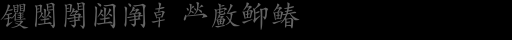

In [66]:
font=ImageFont.truetype(font_path_list[3],30)
gray = Image.fromarray(np.zeros((40,512),dtype=np.uint8))
draw = ImageDraw.Draw(gray)
draw.text((0,0),x[-200:-190],100,font=font)
gray

In [46]:
'2' in x,'＄' in x,x.index('1')

(True, True, 36)

In [51]:
len(x),len(set(x)),

(7406, 7406)

In [64]:
x[-200:-190]

'\ue84f\ue850\ue851\ue852\ue853\ue854\ue855\ue856\ue857\ue858'

In [30]:
font_path_list[8]

'/Users/yizuotian/pyspace/notebook/python/../data/font/方正粗圆简体.ttf'

In [60]:
font.getsize(x[70:74])

(120, 24)

In [6]:
x=list('bcd1234')
x

['b', 'c', 'd', '1', '2', '3', '4']

In [7]:
x.sort();x

['1', '2', '3', '4', 'b', 'c', 'd']

## str index

In [66]:
import codecs
with codecs.open('all_words.txt','r') as f:
    lines=f.readlines()
char_list = [l.strip() for l in lines]

In [67]:
len(char_list),len(set(char_list))


(30656, 30656)

In [69]:
from collections import Counter
x=[k for k,v in Counter(char_list).items() if v >1]
x

[]

In [38]:
%timeit char_list.index(char_list[np.random.randint(30658)])

256 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
strs=''.join(char_list)
%timeit strs.index(char_list[np.random.randint(30658)])

3.45 µs ± 64.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
strs=''.join(char_list)
%timeit strs.index(strs[np.random.randint(30658)])

IndexError: string index out of range

In [60]:
len(strs),len(char_list)

(30656, 30658)

In [65]:
for i,c in enumerate(char_list):
    if not strs.__contains__(c):
        print(i,c)

In [63]:
strs.__contains__('c')

True